In [1]:
import numpy as np
from data_generator.batch_generator import BatchGenerator
from data_generator.batch_generator_params import BatchGeneratorParams
import data_generator.batch_generator_functions as bgf
from utils.util_functions import convert_float_to_binary_mask
from utils.util_functions import convert_mask_to_cup_format
from model.metric_functions.cup_f1_score import cup_f1_score
from typing import List, Tuple

from utils.SYSCONFIG import DATA_PATH, PLATFORM, PROCESSOR_CORES


In [5]:
training_index = f'{DATA_PATH}\\csv_test_index.txt'
test_index = f'{DATA_PATH}\\csv_test_index_val.txt'

In [2]:
tr_gen = BatchGenerator(**BatchGeneratorParams.tune_train)
val_gen = BatchGenerator(**BatchGeneratorParams.tune_val)

2022-06-02 17:33:26.213457   [BatchGenerator] Started initialization ...
2022-06-02 17:33:26.213457   [BatchGenerator] Parsing and verifying index C:\Users\ricof\Documents\AI-Cup 2022\data\split_indices\csv_index_train.txt
2022-06-02 17:33:26.237070   [BatchGenerator] Found 765 data files.
2022-06-02 17:33:26.238059   [BatchGenerator] Found existing version of table in C:\Users\ricof\Documents\AI-Cup 2022\data\tables\tune_train_table.pkl
2022-06-02 17:33:26.238059   [BatchGenerator] Found existing meta data file in C:\Users\ricof\Documents\AI-Cup 2022\data\split_indices\tune_train_meta.json
2022-06-02 17:33:26.239110   [BatchGenerator] Existing meta data file matches current BatchGenerator parameters.
2022-06-02 17:33:26.263789   [BatchGenerator] Found and loaded current version of table indicating 4212 samples across 765 files in C:\Users\ricof\Documents\AI-Cup 2022\data\tables\tune_train_table.pkl
2022-06-02 17:33:26.264799   [BatchGenerator] Generating batch information for shuffled

In [3]:
tr_gen.batches

[[('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\6-5.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\10-3.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\10-5.csv',
   2,
   [2048, 2560]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\142-1.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\87-5.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\44-1.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\137-3.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\83-2.csv',
   3,
   [0, 512, 1024]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\45-2.csv',
   1,
   [2048]),
  ('C:\\Users\\ricof\\Documents\\AI-C

In [4]:
val_gen.batches

[[('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\171-1.csv',
   5,
   [0, 512, 1024, 1536, 2048]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\171-2.csv',
   5,
   [0, 512, 1024, 1536, 2048]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\172-1.csv',
   3,
   [0, 512, 1024]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\172-2.csv',
   3,
   [0, 512, 1024]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\172-3.csv',
   3,
   [0, 512, 1024]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\172-4.csv',
   3,
   [0, 512, 1024]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\172-5.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\173-1.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\173-2.csv',
   4,
   [0, 512, 1024, 1536]),
  ('C:\\Users

In [5]:
val_X, val_y = val_gen.get_data(stack=False)
val_y.shape

2022-06-02 17:33:39.642541   [BatchGenerator] Retrieving all data...
2022-06-02 17:33:41.755652   [BatchGenerator] Retrieved all data.     X : (20, 64, 1024, 16); y : (20, 64, 1024, 2)


(20, 64, 1024, 2)

In [13]:
X, y = val_gen.__getitem__(0)
y.shape

(64, 1024, 2)

In [6]:
BATCH_SIZE = 4
LENGTH = 8
SAMPLE_OFFSET = 0
SAMPLE_FREQ = 4
CENTER = 4
CENTER_OFFSET = 2
IGNORE = ['zeros_ts']

In [7]:
# sample_ts_1
sample_ts_1 = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])
# leads to 3 samples
y_1 = [[0, 0, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0]]

# sample_ts_2
sample_ts_2 = np.array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])
# leads to 2 samples
y_2 = [[0, 1, 1, 0, 1, 1, 0, 1], [1, 1, 0, 1, 1, 0, 0, 0]]

In [8]:
# batches
batches_true = np.array([
    [[0, 0, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0]],
    [[1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 0, 1]],
    [[1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
])

batches_pred = np.array([
    [[0.2, 0.3, 0.4, 0.7, 0.3, 0.3, 0.2, 0.3], [0.6, 0.8, 0.2, 0.2, 0.8, 0.5, 0.2, 0.1]],
    [[0.4, 0.8, 0.4, 0.2, 0.5, 0.7, 0.3, 0.2], [0.1, 0.9, 0.7, 0.2, 0.8, 0.8, 0.2, 0.1]],
    [[0.8, 0.9, 0.1, 0.8, 0.9, 0.2, 0.1, 0.1], [0.0, 0.1, 0.1, 0.0, 0.1, 0.3, 0.1, 0.0]]
])
batches_pred.shape

(3, 2, 8)

In [9]:
table = [
    [('sample_ts_1', 2, [0, 4])],
    [
        ('sample_ts_1', 1, [8]),
        ('sample_ts_2', 1, [0])
    ],
    [
        ('sample_ts_2', 1, [4]),
        ('zeros_ts', 1, [0])
    ]
]

In [18]:
"""
batches_true = np.array([
    [[0, 0, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0]],
    [[1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 0, 1]],
    [[1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
])
"""
ts_true = bgf.convert_batches_to_ts(data=val_y, batch_table=val_gen.batches, center=512, center_offset=256)
ts_true

[array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([

In [10]:
ts_true = bgf.convert_batches_to_ts(data=val_y, batch_table=val_gen.batches, center=512, center_offset=256, ignore='C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\zero.xsv')
ts_true

TypeError: convert_batches_to_ts() missing 1 required positional argument: 'sample_freq'

In [16]:
ts_true = bgf.convert_batches_to_ts(data=val_y, batch_table=val_gen.batches, center=512, center_offset=256)
ts_true

[array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64),
 array([

In [ ]:
ts_pred = bgf.convert_batches_to_ts(data=batches_pred, batch_table=table, center=CENTER, center_offset=CENTER_OFFSET, ignore=IGNORE)
ts_pred

In [21]:
bin_arr = convert_float_to_binary_mask(ts_true[1])
bin_arr

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [22]:
convert_mask_to_cup_format(bin_arr[:, 0])

[[643, 719],
 [781, 863],
 [918, 993],
 [1043, 1123],
 [1173, 1255],
 [1305, 1395],
 [1471, 1546],
 [1631, 1700],
 [1759, 1829],
 [1888, 1970],
 [2025, 2105],
 [2161, 2243],
 [2300, 2378],
 [2442, 2522],
 [2610, 2702]]

In [ ]:
cup_f1_score(y_pred=ts_true, y_true=ts_true)

In [24]:
mat = np.array([[3, 3], [8, 9], [12, 13]])
mat

array([[ 3,  3],
       [ 8,  9],
       [12, 13]])

In [25]:
mat[~(mat[:, 0] == mat[:, 1])]

array([[ 8,  9],
       [12, 13]])

Adapt conversion function

In [13]:
from data_generator.batch_generator_functions import concat_ts_partials

In [64]:
import itertools

def convert_batches_to_ts(data: np.array, batch_table: List[List[Tuple[str, int, List[int]]]], center: int, 
            center_offset: int, sample_freq: int, ignore: List[str] = []) -> List[np.array]:
    """
    Converts a set of batches of data/predictions to a list of time-series
    NOTE: this logic requires that no part of a time series comes before a later
        part in the same time-series; no shuffling is allowed

    Args:
        data (np.array): the data to be converted of the shape (batches, batch_size, ...)
        batch_table (List[List[Tuple[str, int, List[int]]]]): a tavble containing the batch information,
            automatically generated by BatchGenerator
        center (int): The center of a prediction
        center_offset (int): The offset of the prediction center to the prediction start 

    Returns:
        List[np.array]: a list containing the different time-series
    """

    time_series = {}

    for batch_nr in range(len(batch_table)):
        # iterate through the batch_table to find the different time_series by name
        batch_info: List[Tuple[str, int, List[int]]] = batch_table[batch_nr]

        # iterate through the different parts that may constitute one batch
        # e. g.     [('C:\\path\\data\\1-1.csv', 2, [2048, 2560]),
        #            ('C:\\path\\data\\1-2.csv', 2, [0, 512])]

        offset: int = 0
        for piece in batch_info:
            file, _, indices = piece

            if file in ignore:
                continue

            # create an entry for every time_series
            if file not in time_series.keys():
                time_series[file] = {}

            # create an entry for every part of the time_series corresponding to
            # the position within a batch and the position in the time_series
            # e. g. {'C:\\path\\data\\1-1.csv':
            #       {0: [(0, 512), (1, 0), (2, 1024), (3, 1536)],
            #          1: [(0, 2560), (1, 2048)]}
            time_series[file][batch_nr] = [
                (i, indices[i - offset]) for i in range(offset, len(indices) + offset)]
            offset += len(indices)
    
    print(time_series)

    collected_ts = []

    # iterate over all time series
    for key in time_series.keys():
        if key in ignore:
            continue
            
        parts_dict = time_series[key]
        max_pos = None
        for batch_nr in parts_dict.keys():
            indices = parts_dict[batch_nr]
            positions = list(map(lambda x: x[1], indices))
            if max_pos == None:
                max_pos = max(positions)
            if max(positions) > max_pos:
                max_pos = max(positions)    
        
        print(max_pos)
        total = int(max_pos / sample_freq) + 1
        parts = [None] * total
        print(total)
        
        # iterate over the batches containing parts of the time series
        print(f'key {key} total {total} parts_dict {parts_dict}')
        for batch_nr in parts_dict.keys():
            batch = data[batch_nr]
            indices = parts_dict[batch_nr]
            # append the part at the respective index
            for index, pos_in_ts in indices:
                print(f'int({pos_in_ts} / {sample_freq}) {int(pos_in_ts / sample_freq)}')
                parts[int(pos_in_ts / sample_freq)] = batch[index]
        
        
        # adapted itertools-solution from
        # https://stackoverflow.com/questions/60424282/split-a-list-in-python-with-an-element-as-the-delimiter#60424401
        array_or_none = lambda x: not(type(x) == np.ndarray)
        subparts = [list(value) for key, value in itertools.groupby(parts, array_or_none) if not key]
        print(f'parts: {parts} :: subparts {subparts}')
        
        # concatenate the time-series parts to one array according to center and center_offset
        for subpart in subparts:
            concat_ts = concat_ts_partials(
                partials=subpart, center=center, center_offset=center_offset)
            collected_ts.append(concat_ts)

    return collected_ts



In [32]:
X, y = tr_gen.get_data(stack=False)

2022-06-02 11:22:25.126927   [BatchGenerator] Retrieving all data...
2022-06-02 11:22:33.996487   [BatchGenerator] Retrieved all data.     X : (66, 64, 1024, 16); y : (66, 64, 1024, 2)


In [34]:
ts = convert_batches_to_ts(X[:2], tr_gen.batches[:2], 512, 256, 512, [r'C:\Users\ricof\Documents\AI-Cup 2022\data\zero.xsv'])

{'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\132-5.csv': {0: [(0, 512), (1, 1024), (2, 1536), (3, 0)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\41-5.csv': {0: [(4, 1024), (5, 1536), (6, 512), (7, 0)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\146-2.csv': {0: [(8, 2560), (9, 3072), (10, 2048), (11, 512), (12, 1536), (13, 0), (14, 1024)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\11-5.csv': {0: [(15, 0), (16, 1024), (17, 2048), (18, 1536), (19, 512)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\4-5.csv': {0: [(20, 1536), (21, 0), (22, 1024), (23, 512)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\42-3.csv': {0: [(24, 0), (25, 1024), (26, 512)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\111-3.csv': {0: [(27, 1024), (28, 1536), (29, 512), (30, 0)]}, 'C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\12-11.csv': {0: [(31, 0),

parts: [array([[-7.919675e-03, -6.957105e-02, -5.657895e-04, ..., -1.200000e+00,
         7.000000e-01,  1.600000e+00],
       [-2.986146e-03, -7.277105e-02,  1.334211e-03, ..., -5.000000e-01,
         1.000000e+00,  8.000000e-01],
       [-4.360411e-03, -7.227105e-02,  1.434211e-03, ..., -1.000000e+00,
         1.100000e+00,  1.100000e+00],
       ...,
       [-5.198796e-03, -3.787105e-02,  1.843421e-02, ..., -2.600000e+01,
         2.453000e+02,  1.339000e+02],
       [-5.476147e-03, -3.867105e-02,  1.663421e-02, ..., -2.430000e+01,
         2.444000e+02,  1.441000e+02],
       [-5.244094e-03, -3.867105e-02,  1.663421e-02, ..., -2.450000e+01,
         2.413000e+02,  1.485000e+02]]), array([[ 1.077893e-01,  1.552289e-01,  8.893421e-02, ..., -1.000000e+01,
         2.341000e+02,  1.046000e+02],
       [-3.593684e-02, -3.417105e-02,  1.643421e-02, ..., -2.340000e+01,
         2.480000e+02,  1.117000e+02],
       [-3.631200e-02, -3.447105e-02,  1.823421e-02, ..., -2.830000e+01,
         

In [52]:
from tsaug import visualization as v

(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

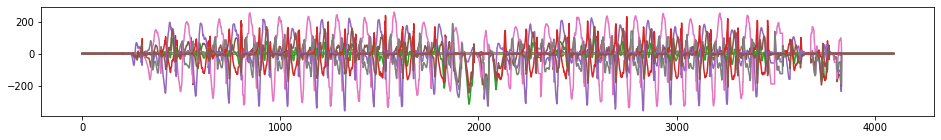

In [68]:
v.plot(np.array([ts[2]]))

(3832, 18)

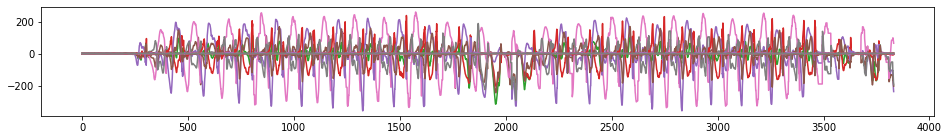

In [70]:
import pandas as pd
df = pd.read_csv('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\146-2.csv')
v.plot(np.array([np.array(df)]))
df.shape

In [58]:
tr_gen.batches[0]

[('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\132-5.csv',
  4,
  [512, 1024, 1536, 0]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\41-5.csv',
  4,
  [1024, 1536, 512, 0]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\146-2.csv',
  7,
  [2560, 3072, 2048, 512, 1536, 0, 1024]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\11-5.csv',
  5,
  [0, 1024, 2048, 1536, 512]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\4-5.csv',
  4,
  [1536, 0, 1024, 512]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\42-3.csv',
  3,
  [0, 1024, 512]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\111-3.csv',
  4,
  [1024, 1536, 512, 0]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\12-11.csv',
  4,
  [0, 1024, 512, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\78-2.csv',
  9,
  [4096, 1536, 3072, 2560, 0, 2048, 512, 

In [12]:
sample_table = tr_gen.sample_table
sample_table

[('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\22-2.csv',
  7,
  [0, 512, 1024, 1536, 2048, 2560, 3072]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\115-4.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\12-2.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\34-2.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\42-3.csv',
  3,
  [0, 512, 1024]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\72-5.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\73-5.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\94-10.csv',
  6,
  [0, 512, 1024, 1536, 2048, 2560]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\155-3.csv',
  10,
  [0, 512, 1024, 1536,

In [16]:
chunk_size = 4
chunk_table = []
for entry in sample_table:
    file, count, indices = entry
    while len(indices) > chunk_size:
        chunk_entry = (file, chunk_size, indices[:chunk_size])
        chunk_table.append(chunk_entry)
        indices = indices[chunk_size:]
    chunk_entry = (file, len(indices), indices)
    chunk_table.append(chunk_entry)
chunk_table

[('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\22-2.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\22-2.csv',
  3,
  [2048, 2560, 3072]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\115-4.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\12-2.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\34-2.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\34-2.csv',
  2,
  [2048, 2560]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\42-3.csv',
  3,
  [0, 512, 1024]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\72-5.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\original_data\\73-5.csv',
  4,
  [0, 512, 1024, 1536]),
 ('C:\\Users\\ricof\\Documents\\AI-Cup 2022\\data\\o